In [6]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
from PIL.ImageStat import Stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import cv2

In [7]:
img = Image.open('../data/lena.jpg')
img_l = img.convert('L')
img_p = img.convert('P')

img.show()
img_l.show()
img_p.show()

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/amit/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE
/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/amit/snap/code/common/.cache/gio-modules/libgiolibproxy.so


eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/amit/snap/code/common/.cache/gio-modules/libgiolibproxy.so


1200 822 L None <class 'PIL.Image.Image'>


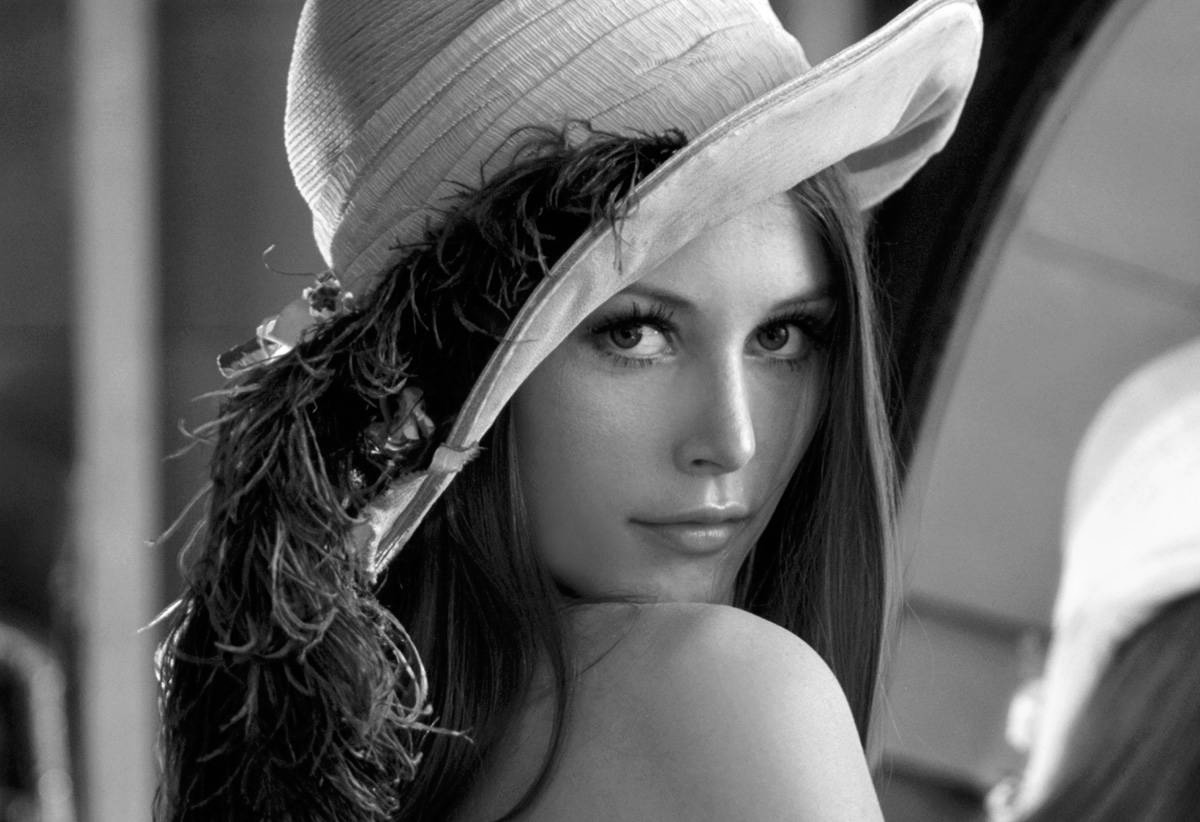

eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [8]:
img = Image.open('../data/lena.jpg').convert('L')

print(img.width, img.height,img.mode, img.format, type(img))
img

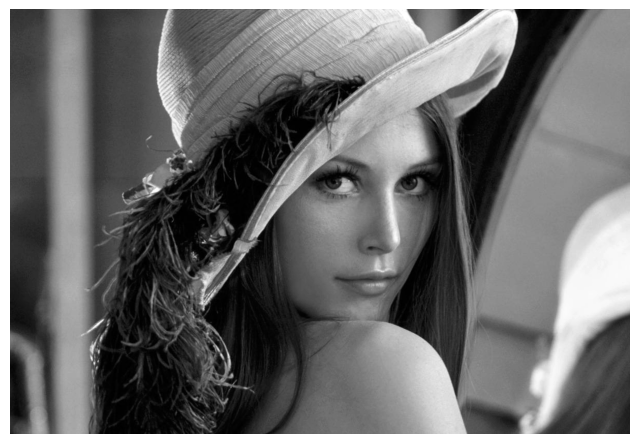

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(img) # display the image
plt.imshow(img, cmap="gray") # display the image
plt.axis('off')
plt.show()

In [10]:
x = np.array(img)
print(x)

[[ 53  52  52 ... 144 144 144]
 [ 56  54  53 ... 144 144 144]
 [ 58  56  54 ... 144 144 144]
 ...
 [ 41  39  37 ...  31  32  32]
 [ 36  35  33 ...  31  31  31]
 [ 33  31  29 ...  31  30  30]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


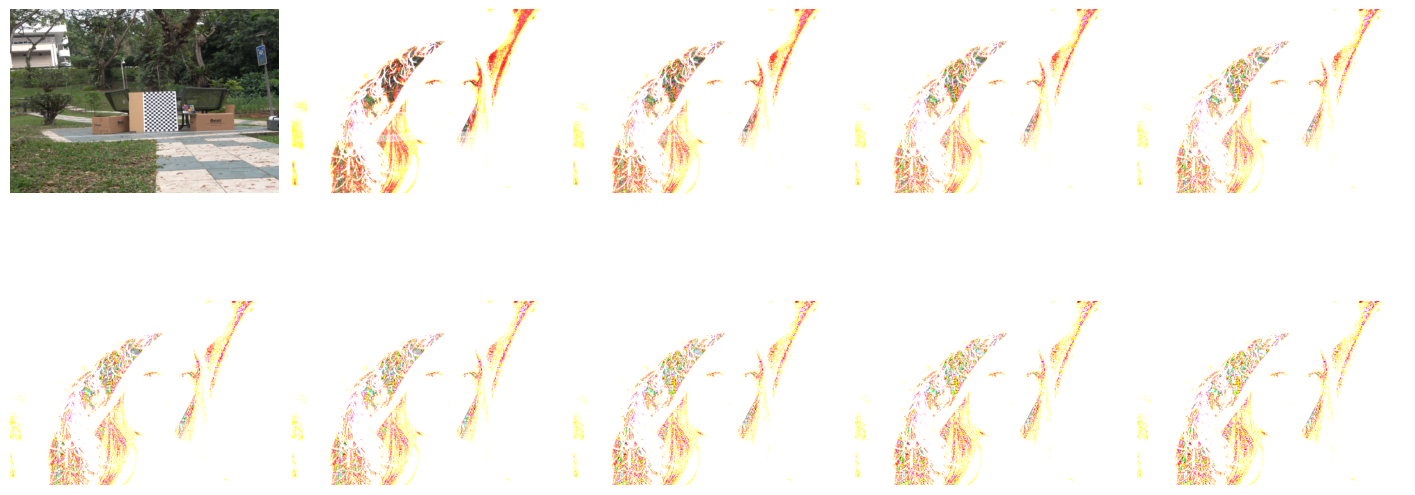

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

# Load the images
img1 = mpimg.imread('../data/lena.jpg')
img2 = mpimg.imread('../data/yard.png')

# Convert img2 to a valid data type and reshape it
img2 = (img2 * 255).astype(np.uint8)  # Convert to uint8 for compatibility with PIL
img2 = np.squeeze(img2)  # Remove singleton dimensions

# Resize img2 using PIL and convert to numpy array
img2_resized = np.array(Image.fromarray(img2).resize((1200, 822), Image.BILINEAR)) / 255

# Initialize subplot counter
i = 1

# Create a figure and plot the images
plt.figure(figsize=(18, 15))
for alpha in np.linspace(0, 1, 10):
    o_img = (1 - alpha) * img2_resized + alpha * img1
    plt.subplot(4, 5, i)
    plt.imshow(o_img)
    plt.axis('off')
    i += 1

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
image = cv2.imread("../data/lena.jpg")
(B, G, R) = cv2.split(image)
# show each channel individually
cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)

Qt: Session management error: Could not open network socket


[[ 53  52  52 ... 144 144 144]
 [ 56  54  53 ... 144 144 144]
 [ 58  56  54 ... 144 144 144]
 ...
 [ 41  39  37 ...  31  32  32]
 [ 36  35  33 ...  31  31  31]
 [ 33  31  29 ...  31  30  30]]


/tmp/ipykernel_323498/2501007833.py:18: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = np.log(fft_signal)
/home/amit/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/amit/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


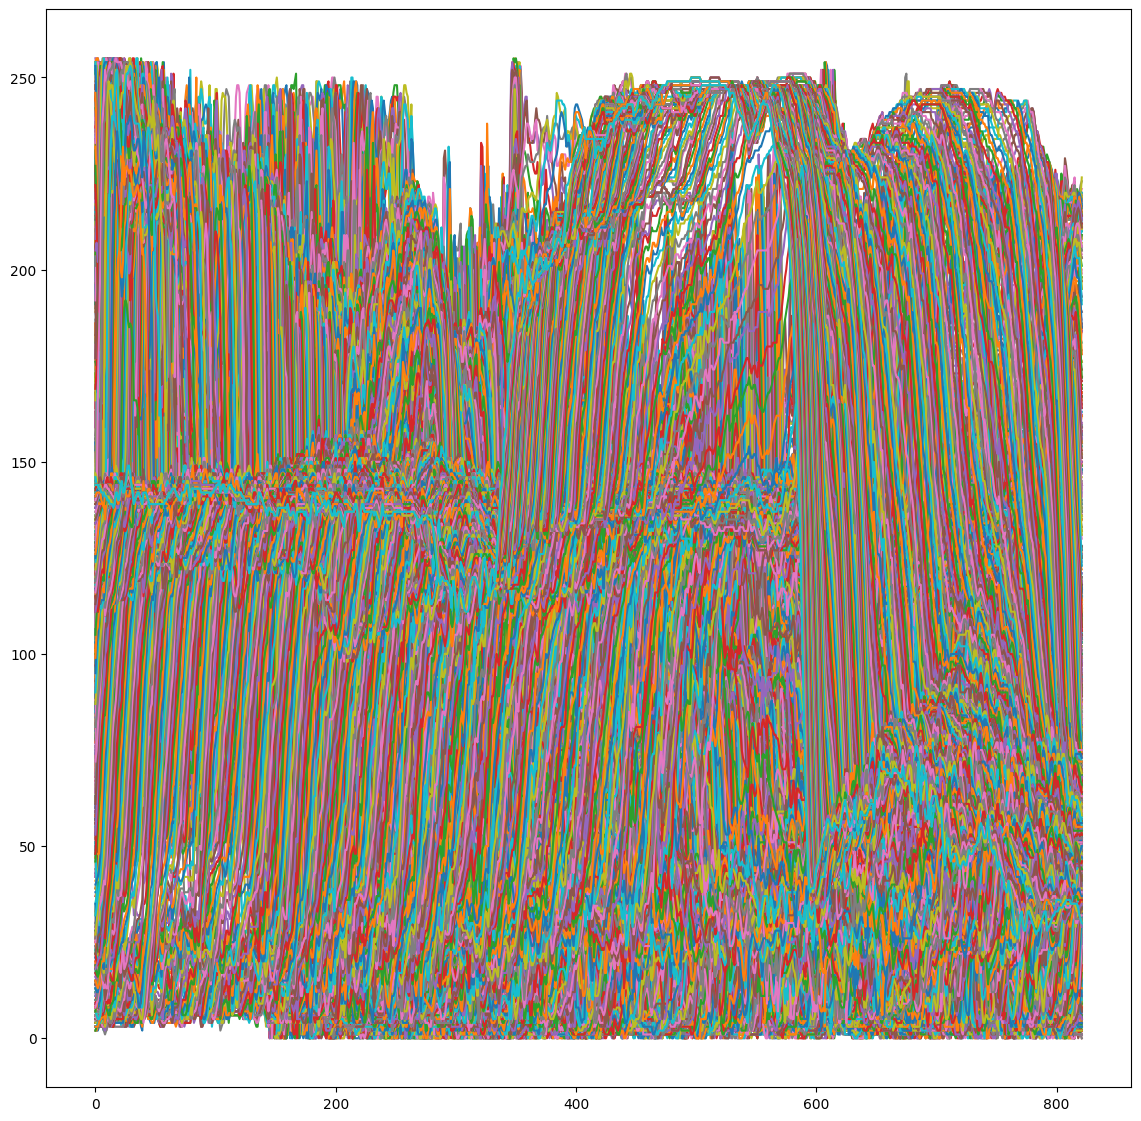

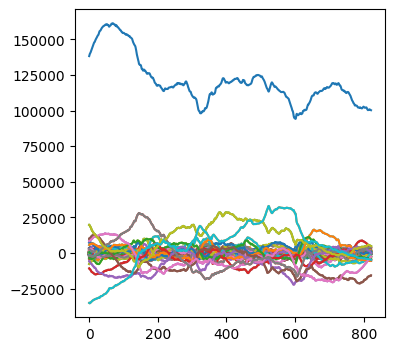

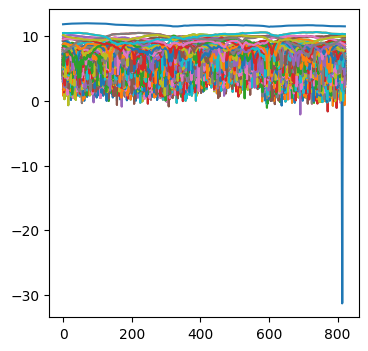

In [13]:
import numpy as np
from scipy.fftpack import fft

# Create a signal
signal1 = np.sin(2 * np.pi * 100 * np.linspace(0, 1, 100))
signal2 = np.cos(np.pi * .100 * np.linspace(2, 3, 100))

im = Image.open("../data/lena.jpg")
im_l = im.convert('L')

signal = np.array(im_l)
print(signal)

# Compute the FFT
fft_signal = fft(signal)

# Compute the magnitude spectrum
magnitude_spectrum = np.log(fft_signal)
#print(magnitude_spectrum)

# Compute the phase of the Fourier transform
phase = np.angle(fft_signal)

# Plot the magnitude spectrum
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
plt.plot(signal) # display the image

plt.figure(figsize=(4,4))
plt.plot(fft_signal)

plt.figure(figsize=(4,4))
plt.plot(magnitude_spectrum )

plt.show()

[-500 -499 -498 ...  498  499  500] [-2.38868024e-15 -3.14107591e-02 -6.27905195e-02 ...  6.27905195e-02
  3.14107591e-02  2.38868024e-15]


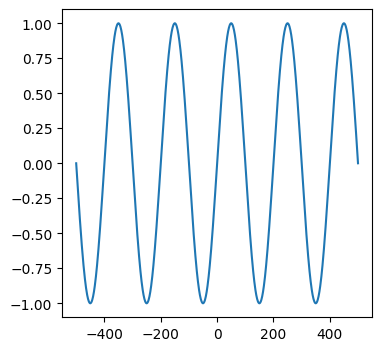

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)

wavelength = 200
y = np.sin(2 * np.pi * x / wavelength)
print(x,y)
plt.figure(figsize=(4,4))
plt.plot(x, y)
plt.show()

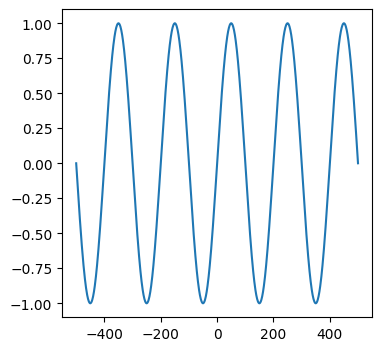

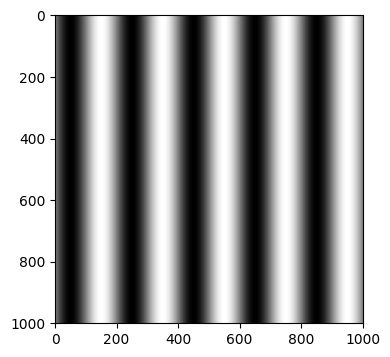

In [16]:
# Direction of the frequency in x direction
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

y = np.sin(2 * np.pi * x / wavelength)

plt.figure(figsize=(4,4))
plt.plot(x, y)

wavelength = 200
grating = np.sin(2 * np.pi * X / wavelength)

plt.figure(figsize=(4,4))
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

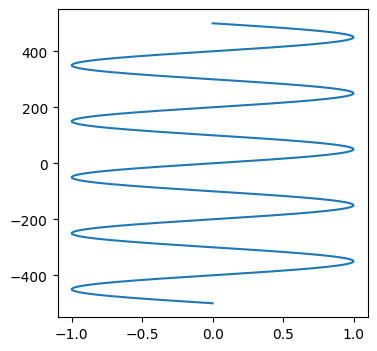

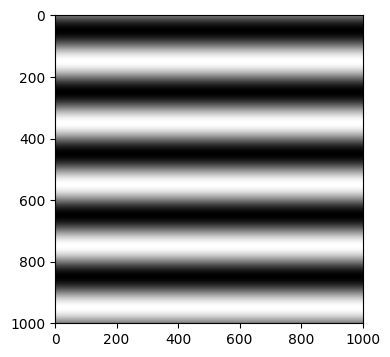

In [17]:
# Direction of the frequency in x direction
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

Y, X = np.meshgrid(x, x)

y = np.sin(2 * np.pi * x / wavelength)

plt.figure(figsize=(4,4))
plt.plot(y, x)

wavelength = 200
grating = np.sin(2 * np.pi * X / wavelength)

plt.figure(figsize=(4,4))
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

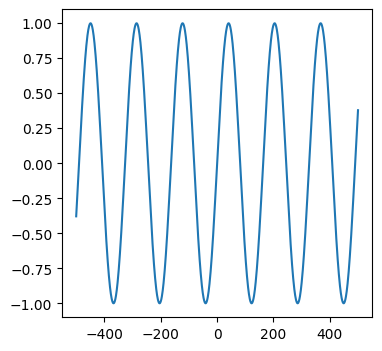

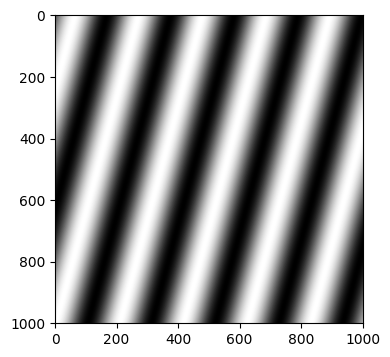

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
angle = np.pi / 12

y = np.sin(2*np.pi*(x*np.cos(angle) + x*np.sin(angle)) / wavelength )

plt.figure(figsize=(4,4))
plt.plot(x, y)
plt.figure(figsize=(4,4))
plt.set_cmap("gray")

grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength )
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

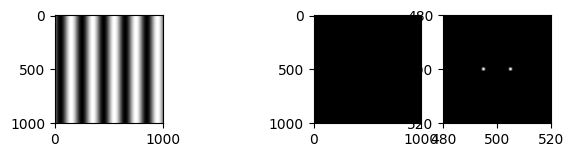

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
angle = 0
signal = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength )

plt.set_cmap("gray")
plt.subplot(141)
plt.imshow(signal)

# Calculate Fourier transform of signal
#ft1 = np.fft.ifftshift(signal)
ft2 = np.fft.fft2(signal)   #  calculates the 2D Fourier transform 
ft3 = np.fft.fftshift(ft2)

plt.subplot(143)
plt.imshow(abs(ft2))

plt.subplot(144)
plt.imshow(abs(ft3))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

In [20]:
import numpy as np

# Define the scale parameter (sigma) and the size of the noise array
sigma = 1.0
size = (100, 100)  # Size of the noise array

# Generate random numbers u uniformly distributed in the range [0, 1]
u = np.random.rand(*size)

# Generate Rayleigh noise samples using the formula
noise = sigma * np.sqrt(-2 * np.log(u))

# Display the noise array or use it in further processing
print(noise)

[[0.35882514 1.00335861 3.12171575 ... 0.83552687 1.23950349 1.09320724]
 [1.35357746 0.99626744 0.19384309 ... 1.82883444 0.86774653 0.776653  ]
 [1.51427413 2.28933431 2.04442829 ... 0.5619584  1.81798394 1.09034538]
 ...
 [0.28914034 1.98812207 1.9978428  ... 0.49556891 1.28002612 1.1738537 ]
 [0.8456675  2.13845499 1.17013064 ... 1.65382112 0.73252252 1.17747808]
 [0.60331141 0.9869351  0.37821407 ... 1.03582758 0.81873567 1.00151444]]


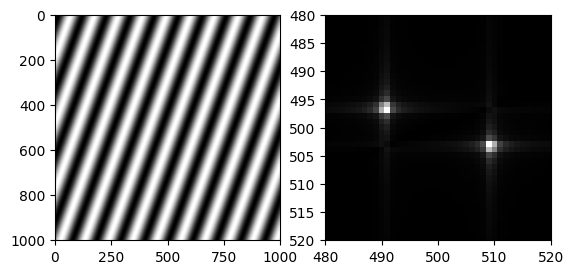

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

wavelength = 100
angle = np.pi/9 # 20 degree shift
signal = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(signal)

# Calculate Fourier transform of grating
#ft = np.fft.ifftshift(grating)

ft = np.fft.fft2(signal)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

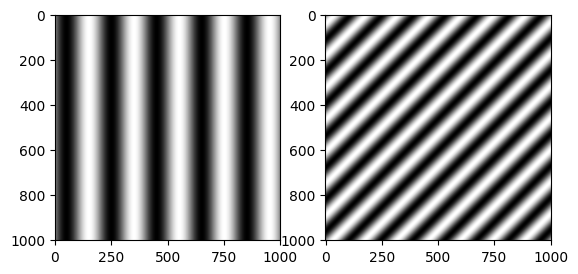

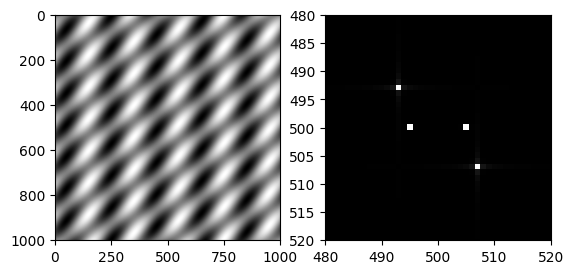

In [22]:
# combined waves

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength_1 = 200
angle_1 = 0
signal_1 = np.sin(2*np.pi*(X*np.cos(angle_1) + Y*np.sin(angle_1)) / wavelength_1)
wavelength_2 = 100
angle_2 = np.pi/4
signal_2 = np.sin(2*np.pi*(X*np.cos(angle_2) + Y*np.sin(angle_2)) / wavelength_2)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(signal_1)
plt.subplot(122)
plt.imshow(signal_2)
plt.show()

signals = signal_1 + signal_2

# Calculate Fourier transform of the sum of the two signals
#ft = np.fft.ifftshift(signals)
ft = np.fft.fft2(signals)
ft = np.fft.fftshift(ft)

plt.figure()
plt.subplot(121)
plt.imshow(signals)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

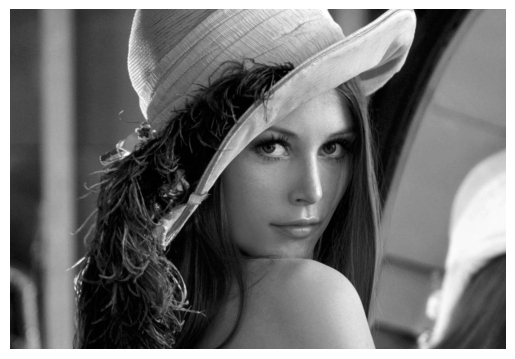

In [23]:
import numpy as np
from scipy.fftpack import fft

im = Image.open("../data/lena.jpg")
im_l = im.convert('L')
img = np.array(im_l)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

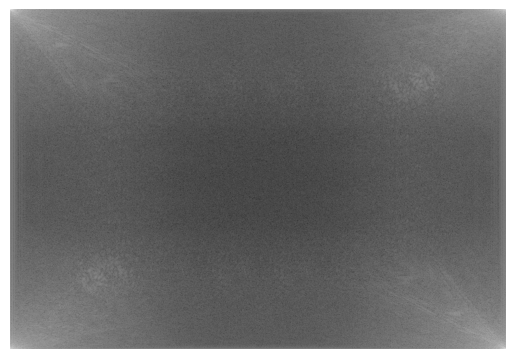

In [24]:
# Taking Fourior Transform of the image in frequency domain
F_img = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F_img)), cmap='gray')  # complex matrix so absolute values are printed
plt.axis('off')
plt.show()
# Note the output is not center shifted. The (0,0) has the bright DC component. 

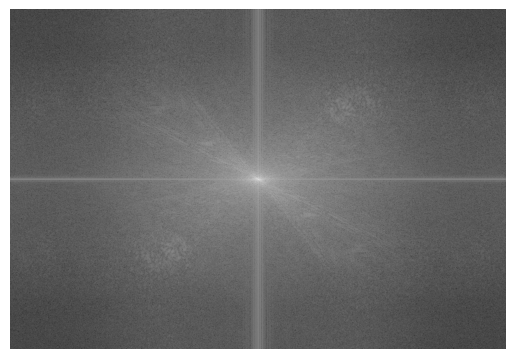

In [25]:
# Note: np.log1p(x) : calculate natural logarithmic value of x+1.
Fshift = np.fft.fftshift(F_img)
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')  
# note: transformation funtion is applied after shift of the absolute values and not the complex 
plt.axis('off')
plt.show()

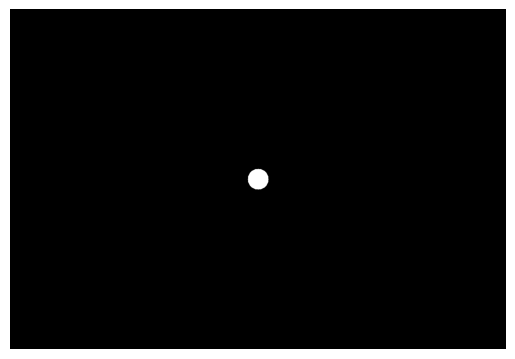

725.8794665783018


In [26]:
# Creating a Filter: Low pass filter
# Note : We are creating an ideal low pass filter 
M,N = img.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 25
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)  # computing eucledian distance from the center of t
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show() 
print(D)

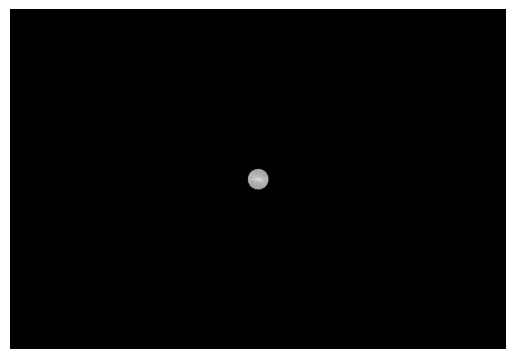

[[-0.+0.j -0.+0.j  0.+0.j ... -0.+0.j  0.+0.j  0.-0.j]
 [ 0.+0.j  0.-0.j -0.+0.j ...  0.+0.j  0.-0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.-0.j ... -0.+0.j  0.+0.j  0.-0.j]
 ...
 [ 0.+0.j  0.+0.j -0.+0.j ...  0.-0.j -0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j ... -0.+0.j -0.+0.j  0.-0.j]
 [ 0.+0.j  0.+0.j -0.+0.j ...  0.+0.j  0.-0.j -0.+0.j]]


In [27]:
# Ideal Low Pass Filtering is applied on the image to remove the high frequencies
G_out = Fshift * H
plt.imshow(np.log1p(np.abs(G_out)), cmap='gray')
plt.axis('off')
plt.show()
print(G_out)

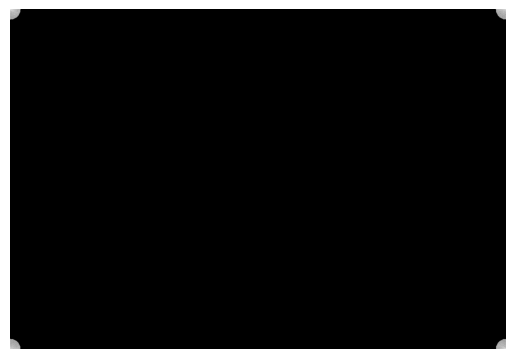

[[ 99283519.        +0.00000000e+00j   4068341.46221755+1.58788046e+07j
    8546286.97572719-4.82461618e+06j ...
    -193150.50357726-7.91457275e+06j   8546286.97572719+4.82461618e+06j
    4068341.46221755-1.58788046e+07j]
 [  3717227.06435176-4.00698180e+06j -11386093.878692  +6.72872668e+06j
   -7930133.14928328-3.51713520e+06j ...
    1900916.31626016+1.74308970e+06j  -1530553.97788432+4.63452229e+06j
   -2620081.68919544+1.75063537e+06j]
 [  2318493.7049448 -5.47735619e+06j  -4444502.78369102+1.62086965e+06j
    4456255.44236314+1.75898071e+05j ...
   -1436881.9976882 +2.23153093e+06j   -518663.63252278-3.86500689e+04j
   -1671596.24182104-1.31620779e+06j]
 ...
 [ -1630443.1261522 +1.61647298e+06j   1518812.27217398-2.92051437e+06j
    1271988.55874028+6.26702838e+05j ...
   -3235948.62168114-2.91628183e+06j   1375322.48478149-1.34256864e+03j
    -271692.4586107 -7.43802427e+05j]
 [  2318493.7049448 +5.47735619e+06j  -1671596.24182104+1.31620779e+06j
    -518663.63252278+3.86500689

In [29]:
# Inverse Fourier Transform is taken to shift the cordinate system and the frequencies to their i
G = np.fft.ifftshift(G_out)
# plt.imshow((np.abs(G)), cmap='gray')  # Will display black as not transformed so frequencies wi
plt.imshow(np.log1p(np.abs(G)), cmap='gray') # Note: transformed display and frequency shifted to
plt.axis('off')
plt.show()
print(G)

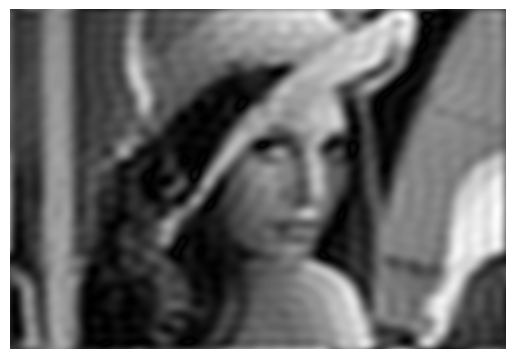

In [30]:
# To get the output as image complex component has to be removed by taking the magnitude. 
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

[[ 53  52  52 ... 144 144 144]
 [ 56  54  53 ... 144 144 144]
 [ 58  56  54 ... 144 144 144]
 ...
 [ 41  39  37 ...  31  32  32]
 [ 36  35  33 ...  31  31  31]
 [ 33  31  29 ...  31  30  30]]


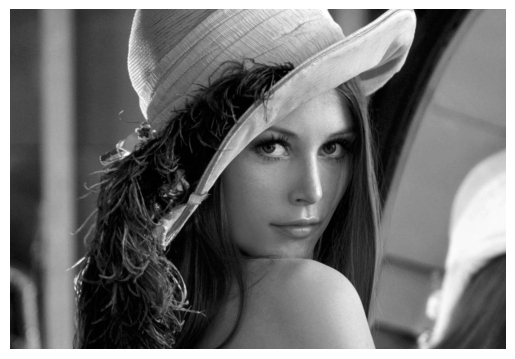

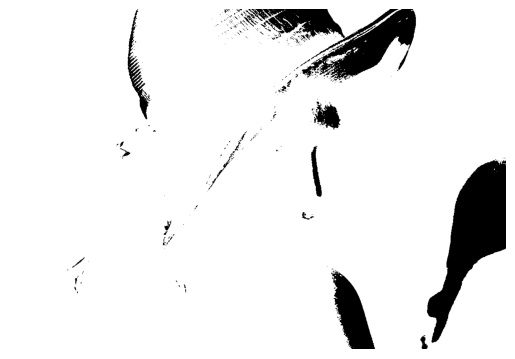

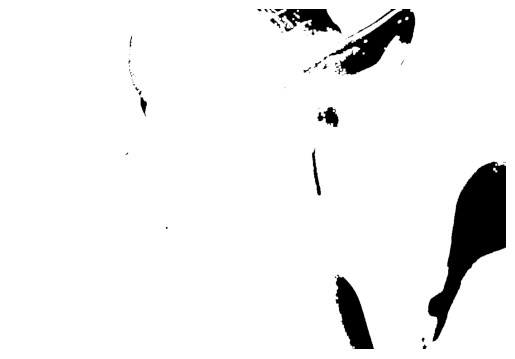

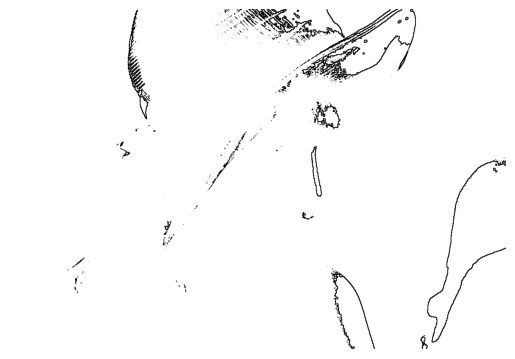

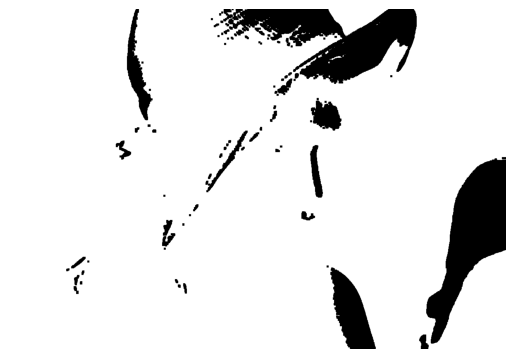

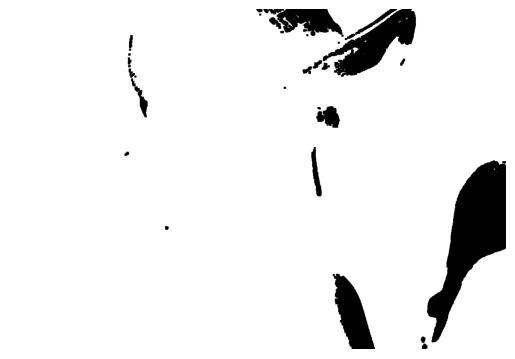

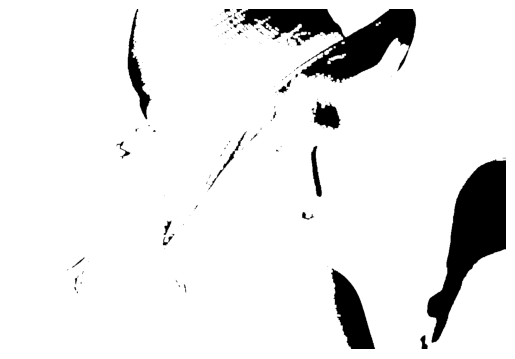

In [32]:
image = Image.open("../data/lena.jpg")

# Convert the image to grayscale
image = image.convert("L")

# Binarize the image
threshold = 200
img = image.point(lambda p: p > threshold and 255)

print(np.array(image) )

template = np.ones((5,5),np.uint8)

# -- Dillation of the Image 
dilation = cv2.dilate(np.array(img),template,iterations = 1)

# -- Erosion of the Image 
erosion = cv2.erode(np.array(img),template,iterations = 1)

# -- Boundary Extraction
dif = np.array(img) - erosion

# -- Opening of the Image
opening = cv2.morphologyEx(np.array(img), cv2.MORPH_OPEN, template)

# -- Closing of the Image
closing = cv2.morphologyEx(np.array(img), cv2.MORPH_CLOSE, template)

plt.figure()
plt.imshow(image)
plt.axis('off')

plt.figure()
plt.imshow(img, cmap='binary')
plt.axis('off')

plt.figure()
plt.imshow(erosion, cmap='binary')
plt.axis('off')

plt.figure()
plt.imshow(dif, cmap='binary')
plt.axis('off')

plt.figure()
plt.imshow(dilation, cmap='binary')
plt.axis('off')

plt.figure()
plt.imshow(opening, cmap='binary')
plt.axis('off')

plt.figure()
plt.imshow(closing, cmap='binary')
plt.axis('off')
plt.show()

In [34]:
# Built in Structuring Element creation

# Rectangular Kernel
a = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print(a)

# Elliptical Kernel
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

# Cross-shaped Kernel
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
# you may build multiple shapes of templates/kernels/Structuring Elements

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

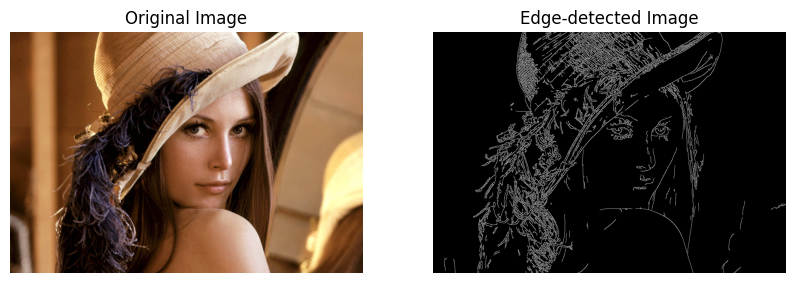

In [36]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open the image using Pillow
img = Image.open("../data/lena.jpg")

# Convert the image to grayscale
img_gray = img.convert('L')

# Convert the image to a numpy array
img_np = np.array(img_gray)

# Apply Canny edge detection using OpenCV
edges = cv2.Canny(img_np, 60, 150)
#print(edges)
# Convert the edge image back to Pillow format
#edge_img = Image.fromarray(edges)

# Display the images side by side using Matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge-detected Image')
plt.axis('off')
plt.show()

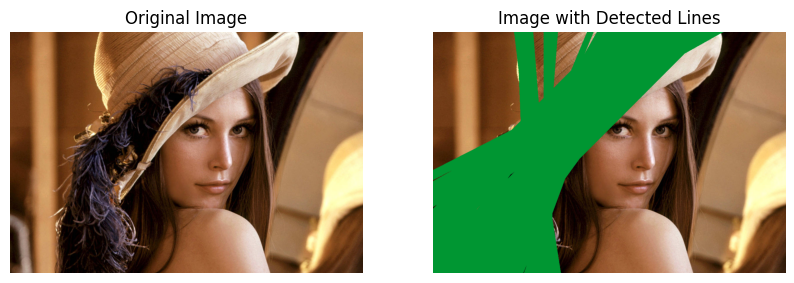

In [38]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image using Pillow
img = Image.open("../data/lena.jpg")

# Convert the image to grayscale
img_gray = img.convert('L')

# Convert the grayscale image to a numpy array
img_np = np.array(img_gray)

# Apply Canny edge detection using OpenCV
edges = cv2.Canny(img_np, 50, 150)

# Apply Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/80, 200)

# Convert the edge image back to Pillow format
edge_img = Image.fromarray(edges)

# Convert the original image to RGB format
img_rgb = np.array(img.convert('RGB'))

# Draw the detected lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_rgb, (x1, y1), (x2, y2), (0, 150, 50), 20)

# Display the original image with detected lines using Matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Image with detected lines
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title('Image with Detected Lines')
plt.axis('off')
plt.show()

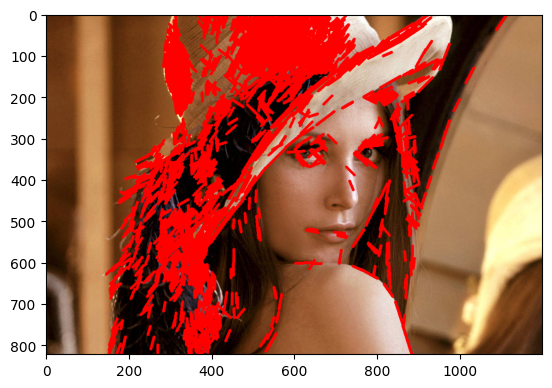

In [40]:
#Applying Hough

import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# Read in the image
image = cv2.imread('../data/lena.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 20
max_line_gap = 5
line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
min_line_length, max_line_gap)
# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
plt.imshow(line_image)